In [1]:
import datetime
from math import *
import csv
import pandas as pd 
import qgrid
import matplotlib.pyplot as plt

Results are in local time not UT

In [2]:
dates = datetime.datetime(2019,6,1,0,0,0)
EndDate = datetime.datetime(2020,6,1,0,0,0)

In [3]:
results = []
while dates<EndDate:
    if (dates>= datetime.datetime(2019,10,27)) and (dates< datetime.datetime(2020,3,29)):
        time_difference_to_UTC = 0
    else:
        time_difference_to_UTC = 1
    
    GHI = 0
    time_in_secs = dates.hour*3600

    d = dates.timetuple().tm_yday

    B = (360*(d-81))/365
    declination_angle = 23.45 * sin(radians(B))

    EoT = 9.87*sin(radians(2*B)) - 7.53*cos(radians(B))-1.5*sin(radians(B))

    LSTM = 15 * time_difference_to_UTC

    longitude = 6.1753115
    latitude = 52.6774361

    TC = 4*(longitude-LSTM)+EoT
    LST = dates + datetime.timedelta(hours=(TC/60))
    HRA = 15*(LST.hour+(LST.minute/60)-12)
    alpha = degrees(asin(sin(radians(latitude))*sin(radians(declination_angle))+cos(radians(declination_angle))*cos(radians(latitude))*cos(radians(HRA))))


    sunrise = 12 - (1/15)*degrees(acos(-1*tan(radians(latitude))*tan(radians(declination_angle))))- (TC/60)
    sunset = 12 +  (1/15)*degrees(acos(-1*tan(radians(latitude))*tan(radians(declination_angle))))- (TC/60)

    try:
        Azimuth_raw = degrees(acos((sin(radians(declination_angle))*cos(radians(latitude))-cos(radians(declination_angle))*sin(radians(latitude))*cos(radians(HRA)))/cos(radians(alpha))))
    except:
        Azimuth_raw = 180
    if HRA >= 0:
        Azimuth = 360 - Azimuth_raw
    else:
        Azimuth = Azimuth_raw

    results.append([dates,sunrise,sunset,alpha,Azimuth])
    dates = dates+ datetime.timedelta(0,3600)
    
df = pd.DataFrame(results,columns=['Date','Sunrise','Sunset','Alpha','Azimuth'])
df = df.set_index('Date')

In [4]:
qgrid.show_grid(df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

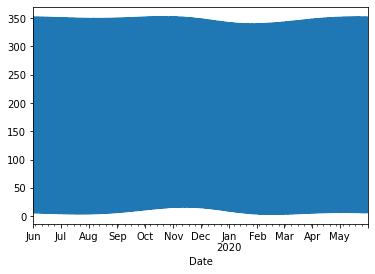

In [5]:
df['Azimuth'].plot()

Will set all Alphas below 0 to 0

In [6]:
 df.loc[df['Alpha']<0,['Alpha','Azimuth']] = 0

In [7]:
df

,Sunrise,Sunset,Alpha,Azimuth
Date,,,,
2019-06-01 00:00:00,4.410933,20.687183,0.000000,0.000000
2019-06-01 01:00:00,4.410933,20.687183,0.000000,0.000000
2019-06-01 02:00:00,4.410933,20.687183,0.000000,0.000000
2019-06-01 03:00:00,4.410933,20.687183,0.000000,0.000000
2019-06-01 04:00:00,4.410933,20.687183,0.000000,0.000000
...,...,...,...,...
2020-05-31 19:00:00,4.410933,20.687183,13.435731,288.844009
2020-05-31 20:00:00,4.410933,20.687183,5.172714,300.179248
2020-05-31 21:00:00,4.410933,20.687183,0.000000,0.000000


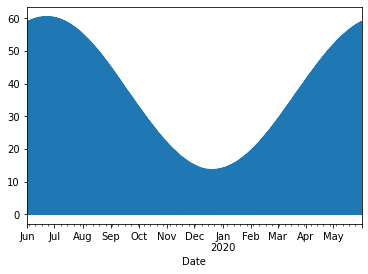

In [8]:
df['Alpha'].plot()

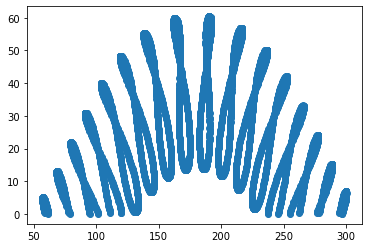

In [9]:
dff = df[df['Alpha']>0]
plt.scatter(dff['Azimuth'],dff['Alpha'])